In [ ]:
import numpy
import pandas
import seaborn
import tensorflow
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.metrics import f1_score, confusion_matrix

"steam.csv" is the preprocessed data. "prepare.py" on the original data must be executed before this step.

In [ ]:
data = pandas.read_csv("steam.csv")

In [ ]:
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

Convert the reviews to vectors that have their meanings encoded in them.

In [ ]:
embeddings = model.encode(data["review_text"], show_progress_bar=True)

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

Pre-generated embeddings can be loaded directly. Executing the above step may take a long time.

In [ ]:
#embeddings = numpy.load("embeddings.npy")

In [ ]:
review_scores = data["review_score"].values

x_train, x_test, y_train, y_test = train_test_split(
    embeddings,
    review_scores,
    test_size=0.2,
    random_state=32,
    stratify=review_scores,
)

x_train = numpy.array(x_train)
x_test = numpy.array(x_test)

In [ ]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Input(shape=(x_train.shape[1],)),
    tensorflow.keras.layers.Dense(128, activation="relu"),
    tensorflow.keras.layers.Dense(64, activation="relu"),
    tensorflow.keras.layers.Dense(1, activation="sigmoid")
])

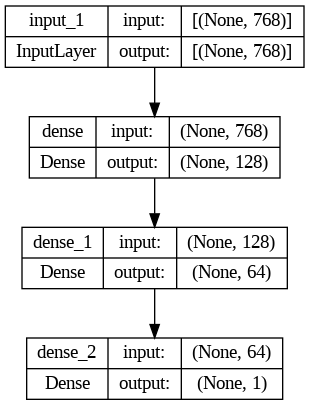

In [ ]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    optimizer="adam",
    metrics=["accuracy"],
    loss="binary_crossentropy"
)

In [ ]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    patience=5,
    monitor="val_loss",
    restore_best_weights=True
)

history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=64,
    callbacks=[early_stopping],
    validation_data=(x_test, y_test)
)

Epoch 1/1000
250/250 [==============================] - 4s 5ms/step - loss: 0.3822 - accuracy: 0.8381 - val_loss: 0.3401 - val_accuracy: 0.8547
Epoch 2/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8606 - val_loss: 0.3305 - val_accuracy: 0.8550
Epoch 3/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8736 - val_loss: 0.3175 - val_accuracy: 0.8640
Epoch 4/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8846 - val_loss: 0.3153 - val_accuracy: 0.8650
Epoch 5/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2602 - accuracy: 0.8968 - val_loss: 0.3222 - val_accuracy: 0.8655
Epoch 6/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2340 - accuracy: 0.9072 - val_loss: 0.3502 - val_accuracy: 0.8495
Epoch 7/1000
250/250 [==============================] - 1s 3ms/step - loss: 0.2075 - accuracy: 0.9189 - val_loss: 0.3359 - val_accuracy:

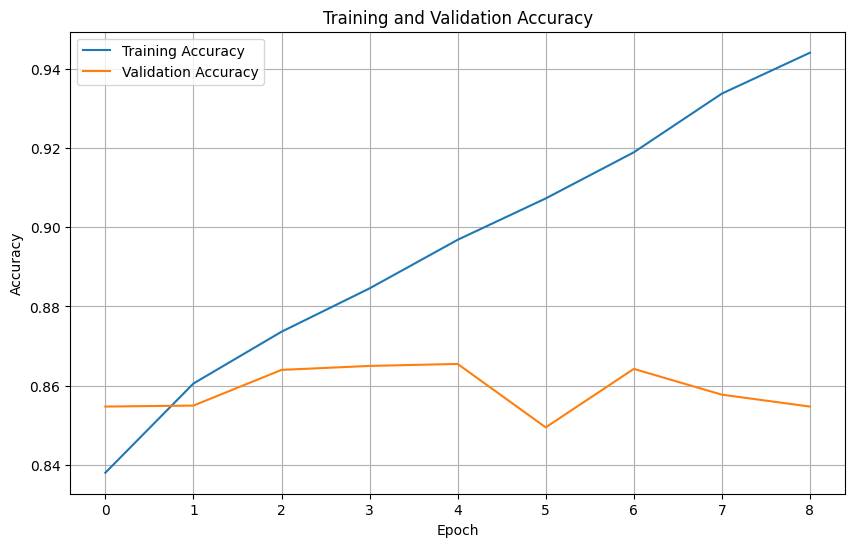

In [ ]:
pyplot.figure(figsize=(10, 6))
pyplot.plot(history.history["accuracy"], label="Training Accuracy")
pyplot.plot(history.history["val_accuracy"], label="Validation Accuracy")
pyplot.title("Training and Validation Accuracy")
pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")
pyplot.legend()
pyplot.grid(True)
pyplot.show()

In [ ]:
model.save("model.keras")

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

predictions = model.predict(x_test)
predicted_classes = (predictions > 0.5).astype("int32")

print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test F1 Score: {f1_score(y_test, predicted_classes):.3f}")

125/125 [==============================] - 0s 1ms/step
Test Loss: 0.315
Test Accuracy: 0.865
Test F1 Score: 0.862


1 means positive sentiment and 0 means negative sentiment.

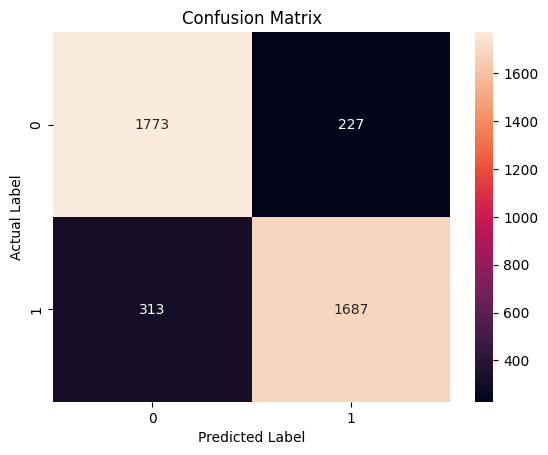

In [ ]:
seaborn.heatmap(confusion_matrix(y_test, predicted_classes), annot=True, fmt="d")
pyplot.xlabel("Predicted Label")
pyplot.ylabel("Actual Label")
pyplot.title("Confusion Matrix")
pyplot.show()

In [ ]:
misclassified_indices = numpy.where(predicted_classes.flatten() != y_test)[0]
random_misclassified_indices = numpy.random.choice(misclassified_indices, size=10)

for i in random_misclassified_indices:
    review_text = data.iloc[i]["review_text"]

    actual_score = y_test[i]
    predicted_score = predicted_classes[i][0]

    print(f"Review: {review_text}")
    print(f"Actual Score: {actual_score}, Predicted Score: {predicted_score}" + "\n")

Review: Cheaters can get you banned. No appeals. Buy more shark cards.
Actual Score: 1, Predicted Score: 0

Review: The game is improvement over Rome 2, yet overall is still a 'Below average' game.  On good side:UI is improved, diplomacy is improved, family tree is back. And no gamebreaking bugs encountered(like this should be even a feature)  On bad side: It still a rome 2, with clunky 1vs1 only fighting animations. While UI is improved it still bad, espicially combat UI. Instead of throwing torches, gates can be broken with melee weapon, brilliant. Repetative battles over the same cities. Absolutelly terrible unit roster(espicially barbarian). Campaign is suffering from poor game design decisions too. Imperium rising from research, Atilla who need's to be killed 5 or 6 times on the battlefield to be actually killed. You can't even create a low level units after research. And there still ridiculous DLC milking, like Blood or cutted factions like longbeards, which is already in game  S